In [311]:
import numpy as np
from numpy import random
from matplotlib import pyplot as plt
%matplotlib inline

In [303]:

def view_samples(samples, m, n):
    fig, axes = plt.subplots(figsize=(100, 100), nrows=m, ncols=n, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(1-img.reshape((10,10)), cmap='Greys_r')  
    return fig, axes

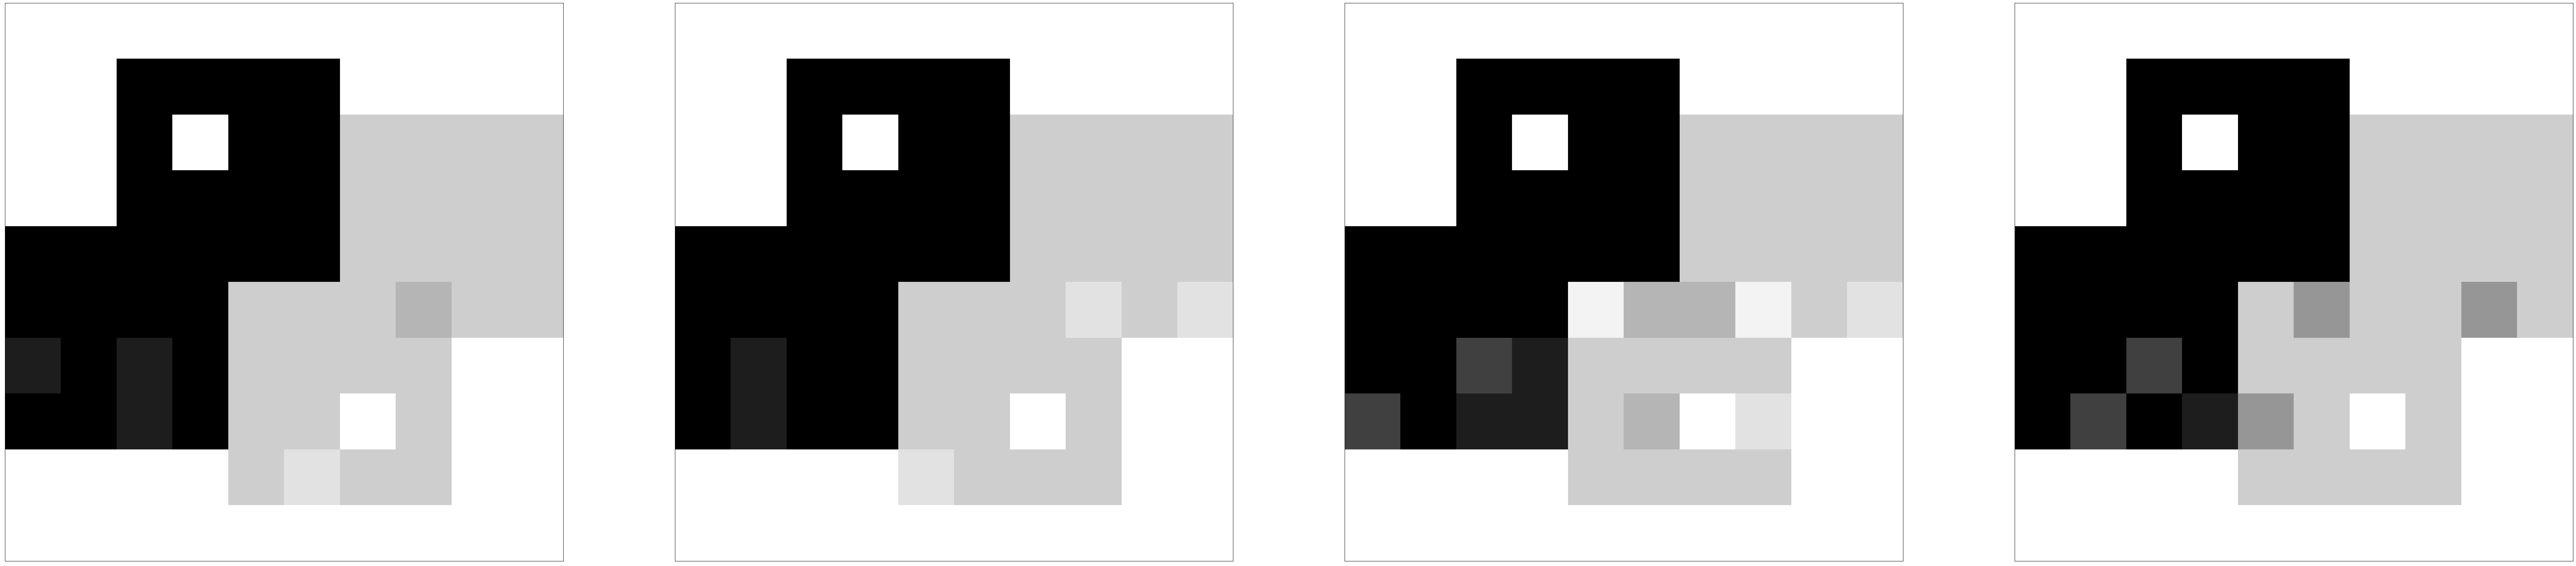

In [312]:
pysyms = [np.array([0,0,0,0,0,0,0,0,0,0,  0,0,1,1,1,1,0,0,0,0,  0,0,1,0,1,1,0.3,0.3,0.3,0.3,   0,0,1,1,1,1,0.3,0.3,0.3,0.3,   1,1,1,1,1,1,0.3,0.3,0.3,0.3,    1,1,1,1,0.3,0.3,0.3,0.4,0.3,0.3,  0.9,1,0.9,1,0.3,0.3,0.3,0.3,0,0,  1,1,0.9,1,0.3,0.3,0,0.3,0,0,  0,0,0,0,0.3,0.2,0.3,0.3,0,0, 0,0,0,0,0,0,0,0,0,0]),
         np.array([0,0,0,0,0,0,0,0,0,0,  0,0,1,1,1,1,0,0,0,0,  0,0,1,0,1,1,0.3,0.3,0.3,0.3,   0,0,1,1,1,1,0.3,0.3,0.3,0.3,   1,1,1,1,1,1,0.3,0.3,0.3,0.3,    1,1,1,1,0.3,0.3,0.3,0.2,0.3,0.2,  1,0.9,1,1,0.3,0.3,0.3,0.3,0,0,  1,0.9,1,1,0.3,0.3,0,0.3,0,0,  0,0,0,0,0.2,0.3,0.3,0.3,0,0, 0,0,0,0,0,0,0,0,0,0]),
         np.array([0,0,0,0,0,0,0,0,0,0,  0,0,1,1,1,1,0,0,0,0,  0,0,1,0,1,1,0.3,0.3,0.3,0.3,   0,0,1,1,1,1,0.3,0.3,0.3,0.3,   1,1,1,1,1,1,0.3,0.3,0.3,0.3,    1,1,1,1,0.1,0.4,0.4,0.1,0.3,0.2,  1,1,0.8,0.9,0.3,0.3,0.3,0.3,0,0,  0.8,1,0.9,0.9,0.3,0.4,0,0.2,0,0,  0,0,0,0,0.3,0.3,0.3,0.3,0,0, 0,0,0,0,0,0,0,0,0,0]),
         np.array([0,0,0,0,0,0,0,0,0,0,  0,0,1,1,1,1,0,0,0,0,  0,0,1,0,1,1,0.3,0.3,0.3,0.3,   0,0,1,1,1,1,0.3,0.3,0.3,0.3,   1,1,1,1,1,1,0.3,0.3,0.3,0.3,    1,1,1,1,0.3,0.5,0.3,0.3,0.5,0.3,  1,1,0.8,1,0.3,0.3,0.3,0.3,0,0,  1,0.8,1,0.9,0.5,0.3,0,0.3,0,0,  0,0,0,0,0.3,0.3,0.3,0.3,0,0, 0,0,0,0,0,0,0,0,0,0]),
        ]

_ = view_samples(faces, 1,4)
# Examples of noisy images

noise = [np.random.randn(10,10) for i in range(20)]
# def generate_random_image():
#     return [np.random.random(), np.random.random(), np.random.random(), np.random.random()]

_ = view_samples(noise, 4,5)

 

In [304]:
def sigmoid(x):
    return np.exp(x)/(1.0+np.exp(x))

In [305]:
# this is coorected code of mine

class Discriminator():
    # initialize the weights and bias
    def __init__(self):
        self.weights = np.array([np.random.normal() for _ in range(100)])  # draws random sample from Gaussian curve
        self.bias = np.random.normal()

    def forward(self, x):
        # Forward pass
        return sigmoid(np.dot(x, self.weights) + self.bias)

    def error_from_image(self, image):
        prediction = self.forward(image)
        # We want the prediction to be 1, so the error is -log(prediction)
        return -np.log(prediction)

    def derivatives_from_image(self, image):
        prediction = self.forward(image)
        derivatives_weights = -image * (1 - prediction)
        derivative_bias = -(1 - prediction)
        return derivatives_weights, derivative_bias

    def update_for_image_d(self, x):
        ders = self.derivatives_from_image(x)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

    def error_from_noise(self, noise):
        prediction = self.forward(noise)
        # We want the prediction to be 0, so the error is -log(1-prediction)
        return -np.log(1 - prediction)

    def derivatives_from_noise(self, noise):
        prediction = self.forward(noise)
        derivatives_weights = noise * prediction
        derivative_bias = prediction
        return derivatives_weights, derivative_bias

    def update_for_noise_d(self, noise):
        ders = self.derivatives_from_noise(noise)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]


In [306]:
class Generator():
    def __init__(self):
        self.weights= np.array([np.random.normal() for i in range(100)])
        self.biases= np.array([np.random.normal() for i in range(100)])
        
    def forward(self,z):
        
        return sigmoid(self.weights*z+self.biases)
    
    def derivate_generator(self,z, discriminator):
        generator_output = self.forward(z)
#         print(f"this is the output of generator(image): {generator_output}")

        discriminator_output = discriminator.forward(generator_output)
        discriminator_weights = discriminator.weights
        
        factor = -(1 - discriminator_output)*generator_output*(1-generator_output)*discriminator_weights
        derivative_weights = factor*z
        derivative_biases = factor
        
        return derivative_weights,derivative_biases
    
    def error(self, z, discriminator):
        x = self.forward(z)
        # We want the prediction to be 0, so the error is -log(1-prediction)
        y = discriminator.forward(x)
        return -np.log(y)
    
    def update(self, z, discriminator):
        error_before = self.error(z, discriminator)
        
        ders = self.derivate_generator(z, discriminator)
        self.weights -= learning_rate * ders[0]
        self.biases -= learning_rate * ders[1]
        
        error_after = self.error(z, discriminator)
#         print("generator: weights {}, bias {}".format(self.weights, self.biases))


In [313]:
# Set random seed
np.random.seed(42)

# Hyperparameters
learning_rate = 0.01
epochs = 100000

# The GAN
D = Discriminator()
G = Generator()

# For the error plot
errors_discriminator = []
errors_generator = []

for epoch in range(epochs):
    
    for pysym in pysyms:
        
        # Update the discriminator weights from the real symbol
        D.update_for_image_d(pysym)
    
        # Pick a random number to generate a fake symbol
        z = random.rand()

        # Calculate the discriminator error
        errors_discriminator.append(sum(D.error_from_image(pysym) + D.error_from_noise(z)))
        
        # Calculate the generator error
        errors_generator.append(G.error(z, D))
        
        # Build a fake symbol
        noise = G.forward(z)
        
        # Update the discriminator weights from the fake symbol
        D.update_for_noise_d(noise)
    
        # Update the generator weights from the fake symbol
        G.update(z, D)

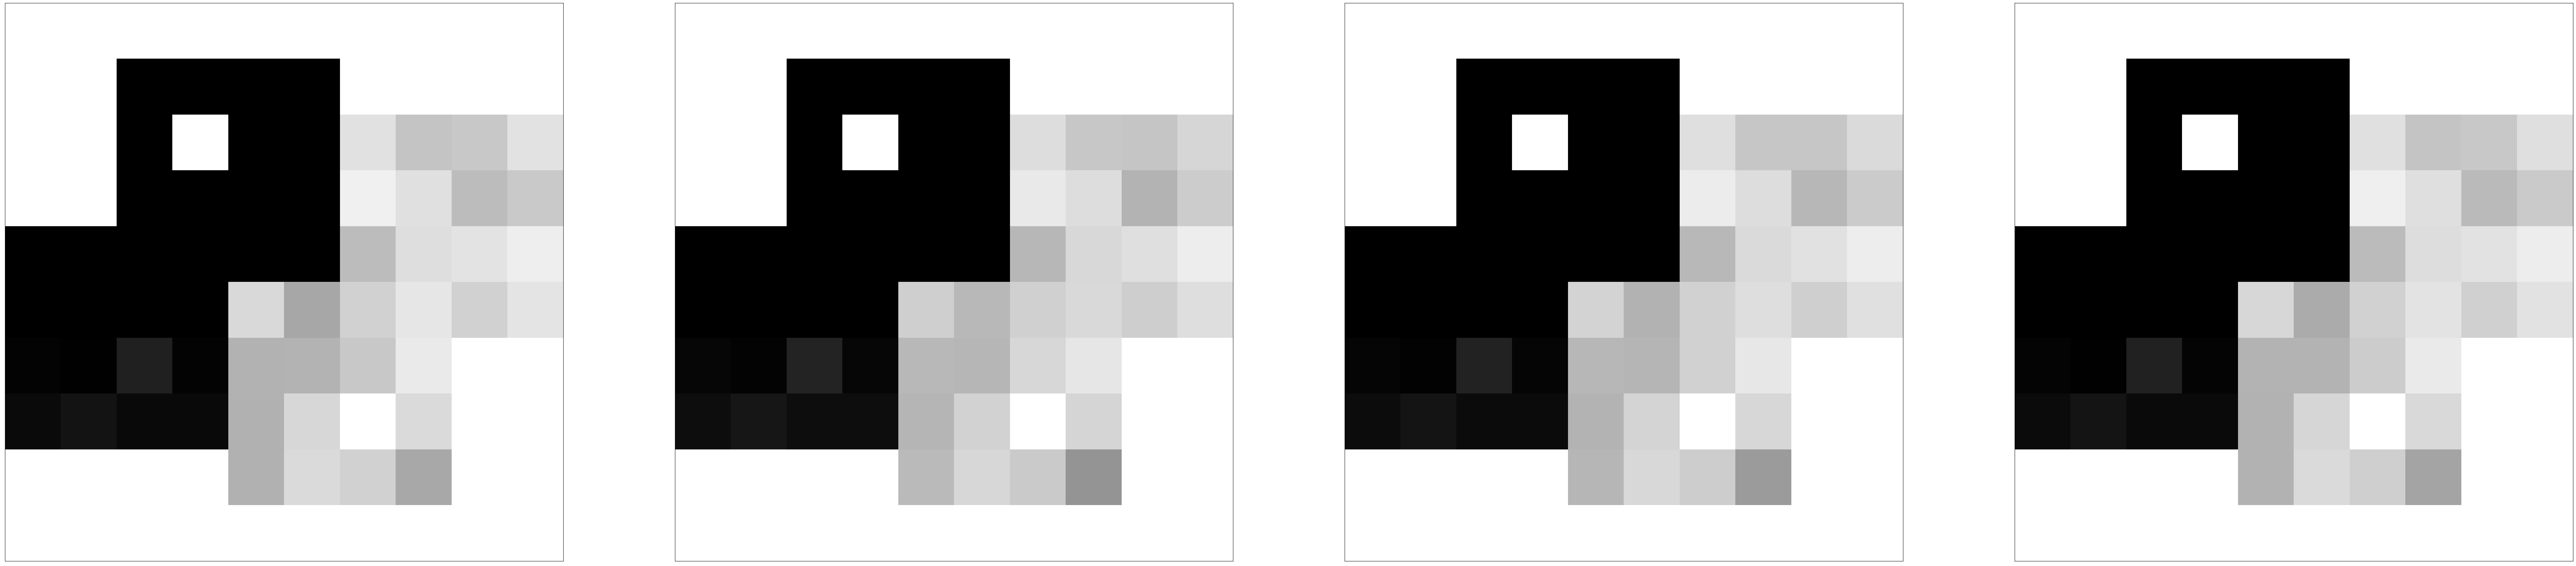

In [314]:
generated_images = []
for i in range(4):
    z = random.random()
    generated_image = G.forward(z)
    generated_images.append(generated_image)
_ = view_samples(generated_images, 1, 4)
# for i in generated_images:
#     print(i)

